In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

#set font size of labels on matplotlib plots
plt.rc('font', size=16)

#set style of plots
sns.set_style('white')

#define a custom palette
sns.palplot(sns.color_palette("hls", 8))

In [2]:
df = pd.read_pickle('../players/player_per100.pkl')

In [3]:
df.head()

,Player,G,GS,MP,FG,FGA,FG%,2P,2PA,2P%,...,AST,STL,BLK,TOV,PF,PTS,ORtg,DRtg,Team,Season
0,Julian Edmonson,30,5.0,568,10.5,26.2,0.401,6.2,15.2,0.411,...,3.0,2.3,0.2,5.6,6.6,34.5,102.3,107.9,abilene-christian,2014
1,Jacob Lancaster,31,11.0,434,12.0,21.7,0.553,11.8,21.5,0.551,...,1.0,1.0,5.0,5.6,6.7,29.1,102.9,99.3,abilene-christian,2014
2,Parker Wentz,31,29.0,1040,7.7,15.7,0.491,3.2,5.6,0.576,...,4.9,2.8,0.1,3.4,4.0,24.5,124.7,107.5,abilene-christian,2014
3,LaDarrien Williams,16,14.0,474,8.1,21.8,0.371,6.4,16.3,0.389,...,7.7,2.4,0.5,4.2,5.2,24.4,101.2,104.1,abilene-christian,2014
4,Harrison Hawkins,16,16.0,481,6.8,18.1,0.374,3.7,10.4,0.353,...,6.3,2.1,0.0,6.0,5.8,24.1,100.9,108.5,abilene-christian,2014


In [4]:
def filter_out_reserves(df):
    df = df.dropna(axis=0, how='any')
    df = df[df['MP'] > np.percentile(df['MP'], 50)]
    return df

In [5]:
def lookup(df):
    df = df[['Player', 'Team', 'Season']]
    return df

In [6]:
def players2018(df):
    df = df[df['Season'] == 2018]
    return df

In [7]:
def cluster_matrix(df):
    df = df.iloc[:, 0:25]
    y = df.iloc[:, 0].as_matrix()
    X = df.iloc[:, 1:].as_matrix()
    return X, y

In [8]:
df = filter_out_reserves(df)
lookup = lookup(df)
players2018 = players2018(df)
X, y = cluster_matrix(players2018)

In [9]:
X.shape

(1799, 24)

In [10]:
scale = StandardScaler()
scale.fit(X)
X_scaled = scale.transform(X)

## PCA

In [11]:
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

In [12]:
pca.explained_variance_ratio_

array([0.27576154, 0.19724612])

In [13]:
X_pca.shape

(1799, 2)

In [14]:
X_pca_df = pd.DataFrame(X_pca, columns=['x','y'])

In [15]:
X_pca_df.head()

,x,y
0,4.127783,0.173044
1,3.054751,-0.877236
2,-0.722006,1.047795
3,1.337828,-2.130438
4,1.469027,0.645942


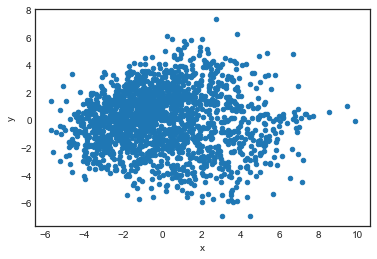

In [16]:
#plot data with seaborn
# facet = sns.lmplot(data=X_reduced_df, x='x', y='y', hue='label', fit_reg=False, legend=True, legend_out=True)
X_pca_df.plot.scatter(x='x', y='y');

## t-SNE

In [17]:
tSNE = TSNE(n_components=2)
X_tSNE = tSNE.fit_transform(X_scaled)

In [18]:
tSNE.kl_divergence_

1.7914034128189087

In [19]:
X_tSNE.shape

(1799, 2)

In [20]:
X_tSNE_df = pd.DataFrame(X_tSNE, columns=['x','y'])

In [21]:
X_tSNE_df.head()

,x,y
0,27.793928,-23.494101
1,24.097530,-23.899986
2,-9.021573,-1.900042
3,13.635001,7.423400
4,9.983254,-16.120974


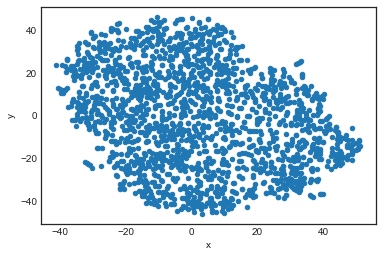

In [22]:
X_tSNE_df.plot.scatter(x='x', y='y');

## SVD

In [25]:
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X_scaled)

In [26]:
svd.explained_variance_ratio_

array([0.27576154, 0.19724612])

In [28]:
X_svd.shape

(1799, 2)

In [29]:
X_svd_df = pd.DataFrame(X_svd, columns=['x','y'])

In [30]:
X_svd_df.head()

,x,y
0,4.127782,0.173044
1,3.054752,-0.877236
2,-0.722006,1.047795
3,1.337828,-2.130439
4,1.469028,0.645942


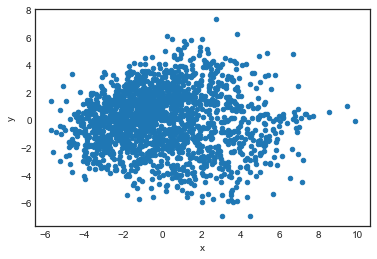

In [31]:
X_svd_df.plot.scatter(x='x', y='y');

## PCA pipeline

In [23]:
PCA_KMeans_pipeline = Pipeline([('scale', StandardScaler()),
                                ('PCA', PCA(n_components=2)),
                                ('KMeans', KMeans())])
Xt = PCA_KMeans_pipeline.fit_transform(X);

In [24]:
Xt.shape

(1799, 8)